In [1]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from collections import Counter, defaultdict

In [2]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
df = df_[df_["cluster"]==6]

def tokenize(dataset, column):
    from nltk.stem import WordNetLemmatizer 
    import re 
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    for comment in dataset[column]:
        comment = re.sub("[^-9A-Za-z ]", "" , comment)
        comment = re.sub(r'https?:\/\/?[a-z0-9]+\.[a-z0-9\/]+', 'URL', comment)
        comment = comment.lower()
        tokens = nltk.word_tokenize(comment)
        for word in comment:
            word = lemmatizer.lemmatize(word) 
        
        tokens = " ".join(tokens)
        tokenized_sentences.append(tokens)
    dataset[column] = tokenized_sentences

tokenize(df, "text")

def remove_stopwords(dataset, column):
    stop_words = set(stopwords.words('english')) 
    sentences=[] 
    for comment in dataset["text"]:
        sentence=[] 
        comment = nltk.word_tokenize(comment)
        for word in comment:
            if word not in stop_words:
                sentence.append(word)
        sentences.append(sentence)
    dataset[column] = sentences

remove_stopwords(df,'text')

df.to_csv("topic_6_tokenized_no_stopwords.csv")

C:\Users\vomit\AppData\Local\Temp\ipykernel_24060\1713028139.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = tokenized_sentences
C:\Users\vomit\AppData\Local\Temp\ipykernel_24060\1713028139.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = sentences


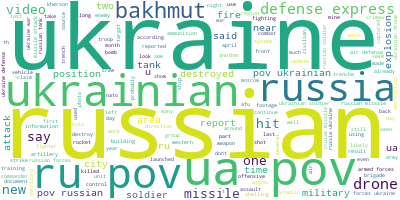

In [3]:
words = " "
for comment in df["text"]:
    for word in comment:
        words += word + " " 

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(words)
wordcloud.to_image()

In [4]:
word_frequencies = Counter()
for sentence in df["text"]:
    for word in sentence:
        word_frequencies[word] += 1
word_frequencies

Counter({'russian': 968,
         'pov': 755,
         'ukrainian': 678,
         'ukraine': 673,
         'ua': 532,
         'ru': 414,
         '-': 359,
         '--': 352,
         'defense': 341,
         'bakhmut': 294,
         'russia': 269,
         'forces': 238,
         'military': 213,
         'drone': 206,
         'express': 203,
         'air': 193,
         'war': 175,
         'missile': 174,
         'missiles': 169,
         'hit': 155,
         'soldiers': 152,
         'russians': 148,
         '9': 148,
         'one': 147,
         'attack': 142,
         'artillery': 140,
         'video': 140,
         'near': 129,
         'said': 126,
         'city': 118,
         'tanks': 113,
         'soldier': 106,
         'new': 106,
         'drones': 103,
         'wagner': 101,
         'killed': 100,
         'says': 98,
         'also': 98,
         'people': 97,
         'us': 97,
         'destroyed': 95,
         'tank': 95,
         'ukraines': 92,
        

In [5]:
df = df_[df_["cluster"]==6]
scoredf = df.sort_values(by=["score"], ascending= False)
for post in scoredf["text"][:200]:
    print(post)

Iran ships 300,000 artillery shells and 1 million rounds of ammunition to Russia within six months
Ukraine receives 98% of weapons needed for counteroffensive, US general says
Denmark's Armed Forces confirm Russian ship was seen near the site of Nord Stream explosion
U.S.: Russian Subs in Atlantic ‘More Active Than We’ve Seen Them in Years’
U.S. Wires Ukraine With Radiation Sensors to Detect Nuclear Blasts
BBC confirms identities of 21,700 Russian soldiers killed in Ukraine in 14 months of the war
>Open Source Intelligence analyst Oliver Alexander said that SS-750 was one of six Russian military ships that might have been in the area in the days leading up to the Nord Stream explosion.

One of six
Russian Occupied Ukrainian City Under 'Intense' Fire
Iran TV airs footage of commandos seizing US-bound tanker
The Iranian drones deployed by Russia in Ukraine are powered by stolen Western technology, research reveals
Russian missile destroys residential multi-storey building in Uman, there 

In [3]:
import pandas as pd

In [4]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
df = df_[df_["cluster"]==6]
df = df[df["type"]== "post"]
scoredf = df.sort_values(by=["score"], ascending= False)
i =1
while i<100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK", scoredf["url"].iloc[i])
    i+=1

Ukraine receives 98% of weapons needed for counteroffensive, US general says 
SUBRED: World News LINK https://news.yahoo.com/ukraine-receives-98-weapons-needed-212600321.html
Denmark's Armed Forces confirm Russian ship was seen near the site of Nord Stream explosion 
SUBRED: World News LINK https://www.pravda.com.ua/eng/news/2023/04/27/7399763/
U.S.: Russian Subs in Atlantic ‘More Active Than We’ve Seen Them in Years’ 
SUBRED: World News LINK https://www.usnews.com/news/national-news/articles/2023-04-26/u-s-russian-subs-in-atlantic-more-active-than-weve-seen-them-in-years
U.S. Wires Ukraine With Radiation Sensors to Detect Nuclear Blasts 
SUBRED: World News LINK https://www.nytimes.com/2023/04/28/science/ukraine-nuclear-radiation-sensors.html
BBC confirms identities of 21,700 Russian soldiers killed in Ukraine in 14 months of the war 
SUBRED: World News LINK https://kyivindependent.com/bbc-confirms-identities-of-17-000-russian-soldiers-killed-in-ukraine-in-13-months-of-the-war-2/
Russi

In [5]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
df = df_[df_["cluster"]==6]
df = df[df["type"]== "comment"]
scoredf = df.sort_values(by=["score"], ascending= False)
i =1
while i<100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i])
    i+=1

Rumblings from Russian TG channels that the Ukrainian counter offensive is starting. 
SUBRED: World News LINK nan
The Danish Armed Forces have confirmed that a Danish patrol boat captured 26 photos of the Russian vessel in the area east of Bornholm Island on 22 September 2022. The Russian ship is designed for underwater operations and has an AS-26 Priz mini-submarine on board.  
Earlier, it was reported that the Danish Ministry of Defence had obtained 112 images of Russian vessels in the area. This is the first time the ministry has confirmed that the ship was an SS-750 with a mini-submarine on board. The Danish Defence Ministry refuses to share the photos of the Russian special vessel, as these are "intelligence" images and are involved in "intelligence operations". 
SUBRED: World News LINK nan
Stay tuned for future story on Russian submarine sinking to the bottom of Atlantic due to technical failures. 
SUBRED: World News LINK nan
  *Russian occupational authorities in southern Ukrain

In [6]:
import pandas as pd
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
topic = df_[df_["cluster"]==6]
topic["topic"] = "Ukraine-Russia Combat Events"
topic.to_csv("topic_6_labeled_originaltext.csv")

C:\Users\vomit\AppData\Local\Temp\ipykernel_29576\4010725402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topic["topic"] = "Ukraine-Russia Combat Events"


In [4]:
import pandas as pd
##Create final labelled dataframe with text, embeddings, cluster number and topic label.
topic_0 = pd.read_csv("topic_0_labeled_originaltext.csv")
topic_1 = pd.read_csv("topic_1_labeled_originaltext.csv")
topic_2 = pd.read_csv("topic_2_labeled_originaltext.csv")
topic_3 = pd.read_csv("topic_3_labeled_originaltext.csv")
topic_4 = pd.read_csv("topic_4_labeled_originaltext.csv")
topic_5 = pd.read_csv("topic_5_labeled_originaltext.csv")
topic_6 = pd.read_csv("topic_6_labeled_originaltext.csv")
topic_7 = pd.read_csv("topic_7_labeled_originaltext.csv")

topic_01= pd.concat([topic_0, topic_1])
topic_12= pd.concat([topic_01, topic_2])
topic_123= pd.concat([topic_12, topic_3])
topic_234 = pd.concat([topic_123, topic_4])
topic_345= pd.concat([topic_234, topic_5])
topic_456= pd.concat([topic_345, topic_6])
topic_567= pd.concat([topic_456, topic_7])

topic_456.to_csv("df_w_embedding_cluster_topiclabel.csv")